<a href="https://colab.research.google.com/github/varshita-kariya/CODECRAFT_GA_04/blob/main/ga_task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving my_images.zip to my_images.zip


In [ ]:
import os

# Check what's inside the extracted folder
print("Files found in 'my_images':")
for root, dirs, files in os.walk("my_images"):
    for file in files:
        print(os.path.join(root, file))


Files found in 'my_images':
my_images/my_images/effiltower.jpg
my_images/my_images/van gogh starry night.jpg


In [ ]:
input_path = "my_images/my_images/effiltower.jpg"
target_path = "my_images/my_images/van gogh starry night.jpg"


In [ ]:
!pip install git+https://github.com/tensorflow/examples.git

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow_examples.models.pix2pix import pix2pix

# Define generator and discriminator
generator = pix2pix.unet_generator(output_channels=3, norm_type='batchnorm')
discriminator = pix2pix.discriminator(norm_type='batchnorm', target=True)

# Loss functions
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def generator_loss(disc_generated_output, gen_output, target):
    gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)
    l1_loss = tf.reduce_mean(tf.abs(target - gen_output))
    return gan_loss + (100 * l1_loss)

def discriminator_loss(disc_real_output, disc_generated_output):
    real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)
    generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)
    return real_loss + generated_loss

generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)


  Cloning https://github.com/tensorflow/examples.git to /tmp/pip-req-build-wgeu844d
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/examples.git /tmp/pip-req-build-wgeu844d
  Resolved https://github.com/tensorflow/examples.git to commit 3c7435733a9162481df350e57c53e58d2a705e4d
  Preparing metadata (setup.py) ... done


In [ ]:
@tf.function
def train_step(input_image, target):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        gen_output = generator(input_image, training=True)

        disc_real_output = discriminator([input_image, target], training=True)
        disc_generated_output = discriminator([input_image, gen_output], training=True)

        gen_loss = generator_loss(disc_generated_output, gen_output, target)
        disc_loss = discriminator_loss(disc_real_output, disc_generated_output)

    generator_gradients = gen_tape.gradient(gen_loss, generator.trainable_variables)
    discriminator_gradients = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(generator_gradients, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(discriminator_gradients, discriminator.trainable_variables))


In [ ]:
import matplotlib.pyplot as plt

def generate_images(model, test_input, tar):
    prediction = model(test_input, training=True)
    plt.figure(figsize=(15, 5))

    display_list = [test_input[0], tar[0], prediction[0]]
    title = ['Input Image', 'Target Image', 'Generated Image']

    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.title(title[i])
        plt.imshow((display_list[i] + 1) / 2)
        plt.axis('off')
    plt.show()


In [ ]:
from PIL import Image
import numpy as np

def load_and_preprocess(path):
    img = Image.open(path).resize((256, 256))  # Resize to match model input
    img = np.array(img) / 127.5 - 1  # Normalize to [-1, 1]
    img = tf.convert_to_tensor(img, dtype=tf.float32)
    return tf.expand_dims(img, axis=0)  # Add batch dimension

# Paths you defined earlier
input_path = "my_images/my_images/effiltower.jpg"
target_path = "my_images/my_images/van gogh starry night.jpg"

# Load images
input_image = load_and_preprocess(input_path)
target_image = load_and_preprocess(target_path)


Epoch 1/10


Epoch 2/10


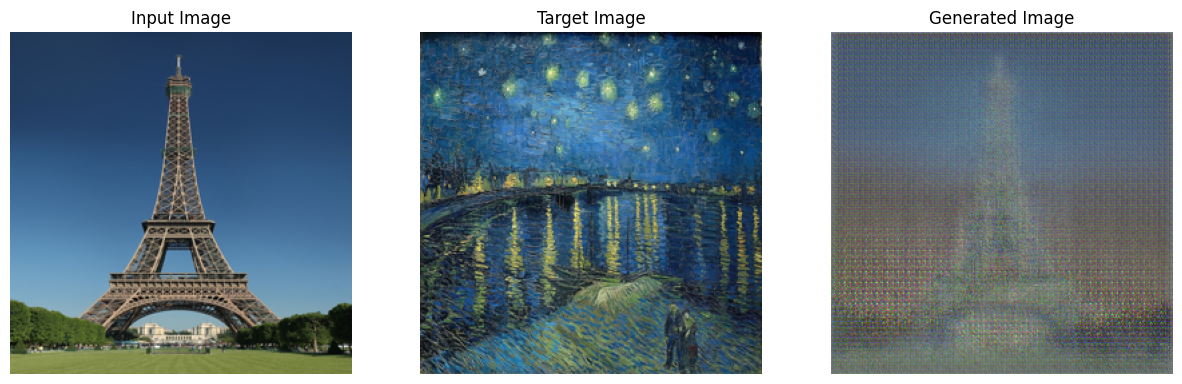

Epoch 3/10


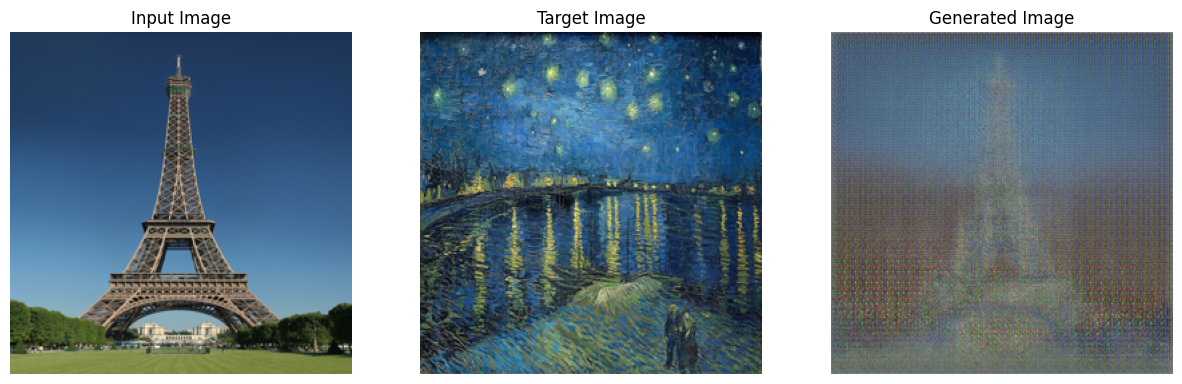

Epoch 4/10


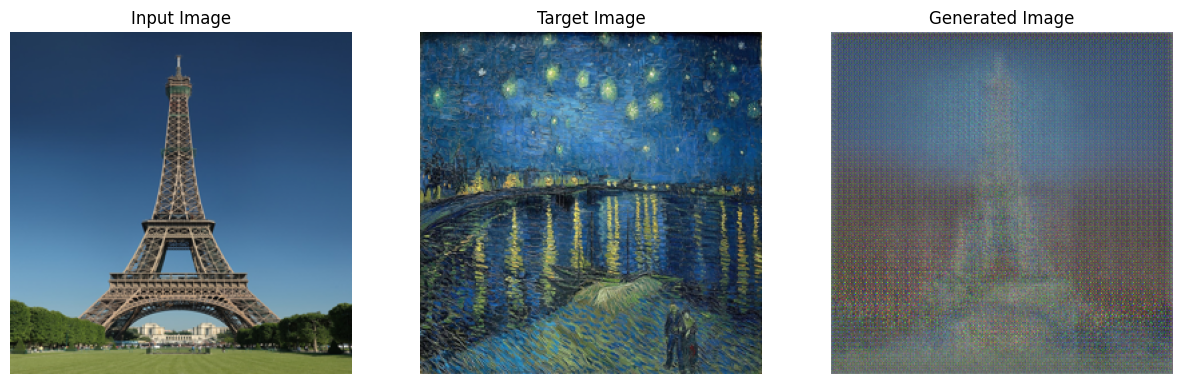

Epoch 5/10


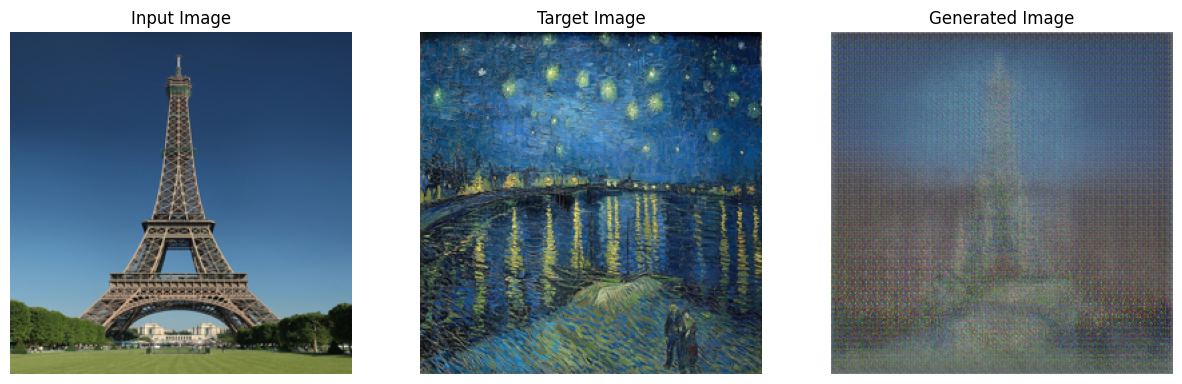

Epoch 6/10


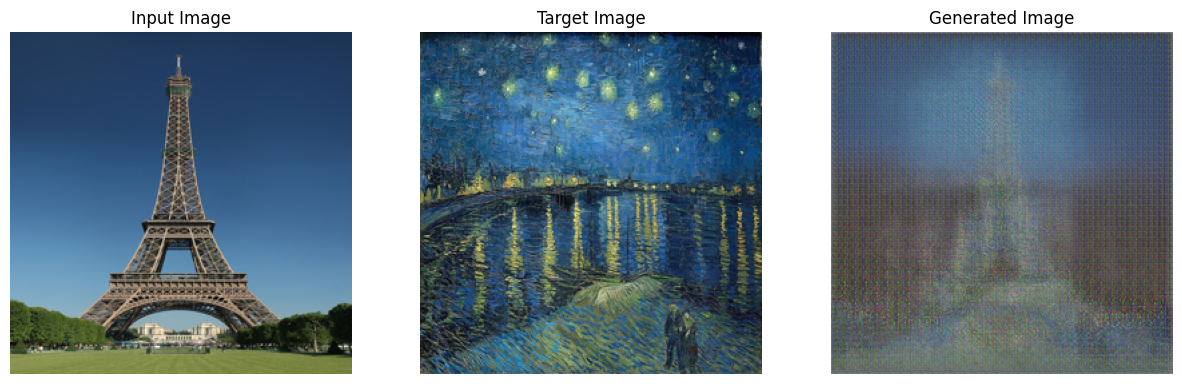

Epoch 7/10


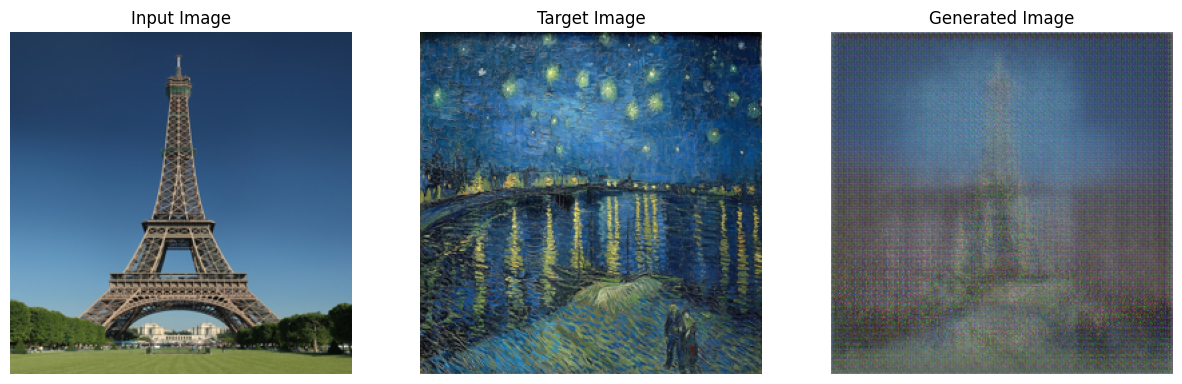

Epoch 8/10


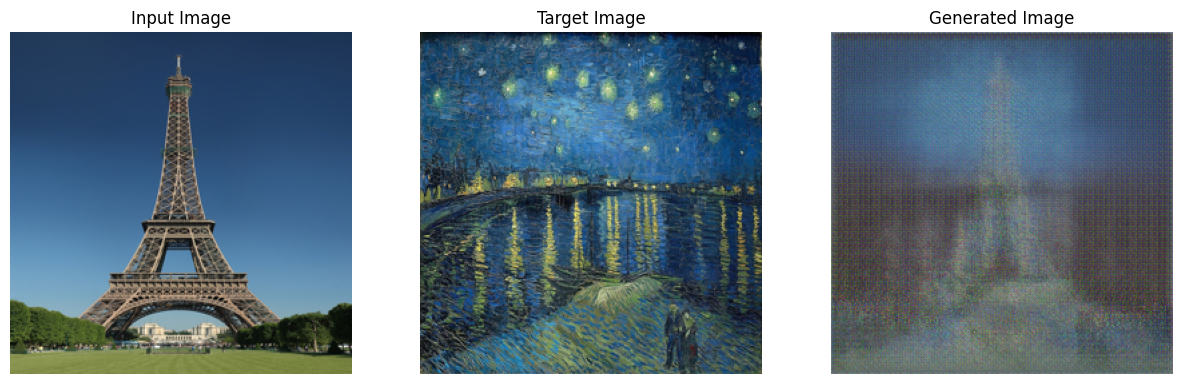

Epoch 9/10


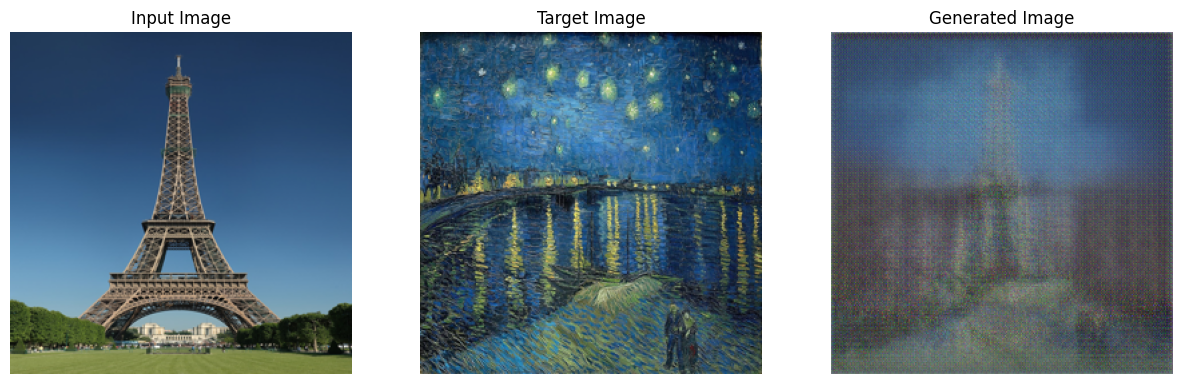

Epoch 10/10


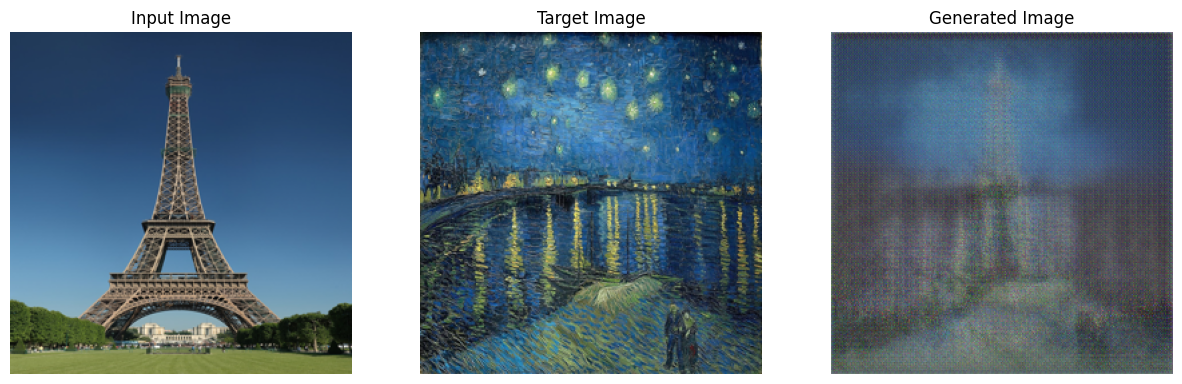

In [ ]:
for epoch in range(10):
    print(f"Epoch {epoch+1}/10")
    train_step(input_image, target_image)
    generate_images(generator, input_image, target_image)
